In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# all dims in meters
IN_TO_METERS = 0.0254
# https://www.dropbox.com/sh/bcnsqxhntwaoxdq/AABFhMAjY68ykwWP5YUB-46za?dl=0&preview=26624a+MIRROR+P1.pdf
# Which dim is considered X and which is Y will depend on how the mapper is mounted on the mirror.
# Verify this before using the files.
MIRRORS = {
    'P1': np.array([23.622, 19.685]) * IN_TO_METERS,
    'K1': np.array([23.622, 18.110]) * IN_TO_METERS,
    'K2': np.array([25.591, 25.591]) * IN_TO_METERS,
    'K3': np.array([29.530, 21.650]) * IN_TO_METERS,
    'F1': np.array([31.496, 18.110]) * IN_TO_METERS,
    '24in_breadboard': np.array([24.00, 24.00]) * IN_TO_METERS,
    # P2 not accessible, not mapped
}

GEOMETRY_HEADER = 'sw_0,sw_1,nw_0,nw_1,se_0,se_1,ne_0,ne_1,w,h\n'

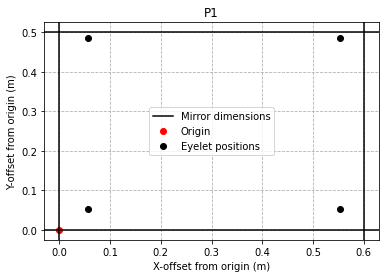

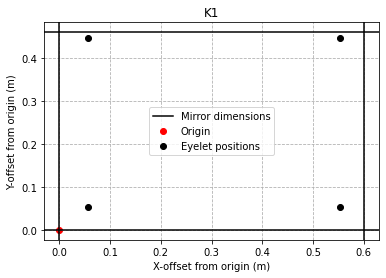

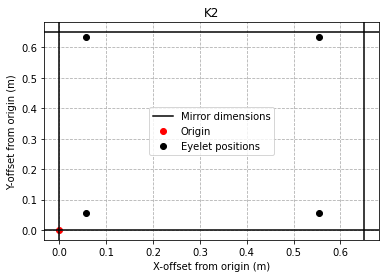

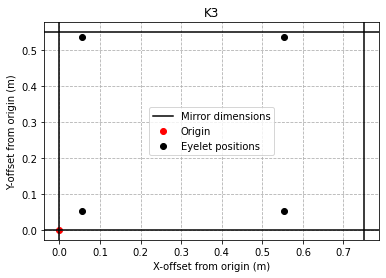

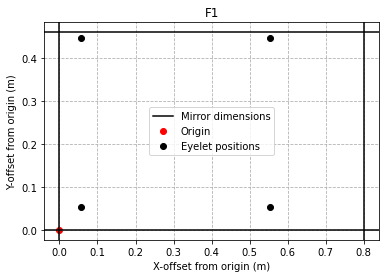

In [11]:
# The N-S (y) distance from the contact patch of the perforated aluminum extrusion frame with the mirror edge
# to the eyelet the fishing line passes through
Y_EYELET_DIST = 0.054 # see HOWTO.md for the measurement/derivation
# The x-positions of each eyelet should be fixed, but if the motor mount brackets are moved to other 
# holes in the aluminum extrusions, these positions may need to be edited after re-measuring.
# The SW corner of the frame is the one with an aluminum side alignment tab.
WESTERN_X = 0.05731
EASTERN_X = 0.5525

# The raft dimensions are determined by the distances between the eyelets on the raft.
# These won't change unless someone makes a new version of the Hawkeye raft.
width = 0.0493 # E-W dim
height = 0.0443 # N-S dim

for i, key in enumerate(MIRRORS.keys()):
    filename = key + '.csv'
    with open(filename, 'w') as f:
        f.write(GEOMETRY_HEADER)
        sw_0 = WESTERN_X # E-W coord
        sw_1 = Y_EYELET_DIST# N-S coord
        nw_0 = WESTERN_X
        nw_1 = MIRRORS[key][1] - Y_EYELET_DIST
        se_0 = EASTERN_X
        se_1 = Y_EYELET_DIST
        ne_0 = EASTERN_X
        ne_1 = MIRRORS[key][1] - Y_EYELET_DIST
        line = ','.join([str(item) for item in [sw_0, sw_1, nw_0, nw_1, se_0, se_1, ne_0, ne_1, width, height]]) + '\n'
        f.write(line) 

        f = plt.figure(i)
        ax = plt.axes()
        ax.set_title(key)
        ax.grid(True, linestyle='--')
        ax.scatter(0., 0., color='r', label='Origin')
        ax.axhline(0, color='k', label='Mirror dimensions')
        ax.axhline(MIRRORS[key][1], color='k')
        ax.axvline(0, color='k')
        ax.axvline(MIRRORS[key][0], color='k')
        ax.scatter([sw_0, nw_0, se_0, ne_0], [sw_1, nw_1, se_1, ne_1], color='k', label='Eyelet positions')
        ax.set_xlabel('X-offset from origin (m)')
        ax.set_ylabel('Y-offset from origin (m)')
        ax.legend(loc='best')
        plt.show()